# Speed Dating 

### Cleanning data 

In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline

In [2]:
import sklearn as sk
import sklearn.tree as tree
import sklearn.preprocessing as pp
import sklearn.metrics as sm
import sklearn.feature_selection as fs
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

In [4]:
data = pd.read_csv('Speed Dating Data.csv',encoding="ISO-8859-1").rename(columns=lambda x: x.strip())
sd_org=data.copy()
sd = sd_org[sd_org['wave']< 15]

In [5]:
# convert income to numeric values
sd['income'] = sd['income'].str.replace(',', '')
sd['income']= pd.to_numeric(sd['income'])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# Drop those colunms for 'half way through' period 
sd= sd.drop(['attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s',
             'attr3_s', 'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s'],axis=1)

In [7]:
# Drop those colunms for 'follow-up 2' period 
sd= sd.drop(['attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3',
             'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3', 'shar2_3',
             'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3',
             'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3', 'shar4_3',
             'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3', 
             'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3',],axis=1)

In [8]:
# Drop attr7_2, because it doesn't pair up with the question asked in the correspoding sign up period
sd= sd.drop('attr7_2',axis=1)

In [9]:
# Drop those columns that won't be used in this analysis 
sd= sd.drop(['id', 'idg', 'condtn', 'position', 'positin1','partner','pid','int_corr',
             'age_o','race_o','from','zipcode','career','career_c','satis_2','length',
             'pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha','field',
             'undergra','mn_sat','tuition','exphappy','expnum','numdat_2','samerace',
             'match_es','you_call','them_cal','date_3','numdat_3','num_in_3'],axis=1)

In [10]:
ten = ['attr3_1', 'sinc3_1',
       'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1',
       'fun5_1', 'amb5_1','attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2',
       'attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2']
hrd = ['attr1_1', 'sinc1_1',
       'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1',
       'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1',
       'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1','sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2',
       'shar7_2', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2',
       'shar1_2', 'attr4_2', 'sinc4_2', 'intel4_2', 'fun4_2', 'amb4_2',
       'shar4_2', 'attr2_2', 'sinc2_2', 'intel2_2', 'fun2_2', 'amb2_2',
       'shar2_2']

In [11]:
# Normalize 10 point scale
sd[ten]=sd[ten].apply(lambda x: ((x-1)/9))

# Normalize 100 point scale
sd[hrd]=sd[hrd].apply(lambda x: x/100)

# Normalize two different scales 
convert=['attr1_1', 'sinc1_1',
       'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1',
       'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1',
       'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1',
       'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1',
       'fun5_1', 'amb5_1', 'sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2',
       'shar7_2', 'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2',
       'shar1_2', 'attr4_2', 'sinc4_2', 'intel4_2', 'fun4_2', 'amb4_2',
       'shar4_2', 'attr2_2', 'sinc2_2', 'intel2_2', 'fun2_2', 'amb2_2',
       'shar2_2', 'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2',
       'attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2']
sd[convert]=sd[convert].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [13]:
sd[ten].head()

,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2
0,0.555556,0.777778,0.777778,0.777778,0.666667,NaN,NaN,NaN,NaN,NaN,0.555556,0.666667,0.777778,0.666667,0.555556,NaN,NaN,NaN,NaN,NaN
1,0.555556,0.777778,0.777778,0.777778,0.666667,NaN,NaN,NaN,NaN,NaN,0.555556,0.666667,0.777778,0.666667,0.555556,NaN,NaN,NaN,NaN,NaN
2,0.555556,0.777778,0.777778,0.777778,0.666667,NaN,NaN,NaN,NaN,NaN,0.555556,0.666667,0.777778,0.666667,0.555556,NaN,NaN,NaN,NaN,NaN
3,0.555556,0.777778,0.777778,0.777778,0.666667,NaN,NaN,NaN,NaN,NaN,0.555556,0.666667,0.777778,0.666667,0.555556,NaN,NaN,NaN,NaN,NaN
4,0.555556,0.777778,0.777778,0.777778,0.666667,NaN,NaN,NaN,NaN,NaN,0.555556,0.666667,0.777778,0.666667,0.555556,NaN,NaN,NaN,NaN,NaN


In [228]:

features =['gender','match','round','order','age','field_cd','race','imprace',\
          'imprelig','date','go_out','sports',\
          'tvsports','exercise','dining','museums','art','hiking','gaming','clubbing',\
          'reading','tv','theater','movies','music','shopping','yoga',\
          'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',\
           'attr2_1', 'sinc2_1','intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1',\
           'sinc3_1','fun3_1', 'intel3_1', 'amb3_1']

In [229]:
sd[features].corr().head()

,gender,match,round,order,age,field_cd,race,imprace,imprelig,date,...,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1
gender,1.000000,-0.000530,0.020630,0.006685,0.070574,-0.080728,-0.018857,-0.113211,-0.199148,-0.101009,...,0.275027,0.299185,-0.046987,0.363349,-0.127549,-0.095813,-0.115562,-0.120355,0.077053,-0.030287
match,-0.000530,1.000000,-0.033257,-0.038731,-0.035055,-0.024641,-0.013268,-0.049032,-0.026014,-0.063610,...,-0.014294,0.026303,-0.009985,-0.000028,-0.037709,0.036439,-0.001965,0.051066,0.004327,0.010592
round,0.020630,-0.033257,1.000000,0.399942,0.007013,0.073147,-0.075542,0.067014,0.061455,0.062259,...,0.041830,-0.018016,-0.053872,0.011768,-0.004931,-0.006992,0.028745,0.004185,0.060556,0.006661
order,0.006685,-0.038731,0.399942,1.000000,0.002959,0.029480,-0.030199,0.026731,0.025282,0.024609,...,0.016720,-0.007067,-0.021886,0.003783,-0.001059,-0.002594,0.011855,0.001646,0.024133,0.002952
age,0.070574,-0.035055,0.007013,0.002959,1.000000,0.138069,-0.058010,-0.147194,-0.054876,0.006817,...,0.014169,-0.009051,-0.030072,0.004812,-0.053225,0.068320,-0.031567,-0.069247,-0.003339,-0.061957


In [ ]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(sd[features].corr(),linewidths=.5, ax=ax)

In [ ]:
#  'imprelig' 
# 'go_out'
# 'art', 'theater', 'shopping', 'sports','movies', 'shar2_1', 'dining', 'amb3_1'
# 'sinc2_1','amb2_1'
# attr1_1/attr2_1 is highly corr with several other attribution
keep =['gender','match','order','age','field_cd','race','imprace','income',\
       'date','exercise','museums','hiking','gaming','clubbing',\
        'reading','tv','music','yoga', 'sinc1_1', 'intel1_1',\
       'fun1_1', 'amb1_1', 'shar1_1','intel2_1', 'fun2_1','sinc3_1','fun3_1', 'intel3_1']

In [ ]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(sd[keep].corr(),linewidths=.5, ax=ax)

In [ ]:
#temp1 = sd[keep].apply(lambda x: x.fillna(x.median()), axis=1)

In [ ]:
temp1.isnull().sum()

In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering

bestSil = -1
for k in range(2,6):
    clus = [KMeans(n_clusters=k,n_jobs=-1), Birch(n_clusters=k), 
            AgglomerativeClustering(n_clusters=k)]
    for cl in clus:
        res = cl.fit(temp1)
        sil = metrics.silhouette_score(temp1, res.labels_)
        print (str(cl)[:10] + ' with k =' +str(k) + ": " + str(round(sil,4)))
        if (sil > bestSil):
            bestSil = sil
            bestCl = cl

In [ ]:
kmeans = KMeans(n_clusters=4)

In [ ]:
cluster = kmeans.fit_predict(temp1)

In [ ]:
temp1['cluster']=cluster

In [ ]:
temp1.groupby('cluster').mean()

# ---------------------------------------------------------------

In [12]:
# select interests
interest = ['match','gender','round','order','age','field_cd','imprace',\
          'imprelig','date','go_out','goal','income','sports','tvsports','exercise',\
          'dining','museums','art','hiking','gaming','clubbing','reading','tv',\
          'theater','movies','music','shopping','yoga']

In [13]:
# include all waves
# Majority group & interest 
wave_m_i = sd[sd['race']==2].loc[:, interest]

In [14]:
len(wave_m_i)
wave_m_i.isnull().sum()

4727

match          0
gender         0
round          0
order          0
age           32
field_cd       0
imprace       16
imprelig      16
date          34
go_out        16
goal          16
income      2017
sports        16
tvsports      16
exercise      16
dining        16
museums       16
art           16
hiking        16
gaming        16
clubbing      16
reading       16
tv            16
theater       16
movies        16
music         16
shopping      16
yoga          16
dtype: int64

In [15]:
# drop nan value
wave_m_i=wave_m_i.dropna(axis=0, how='any')

X_m_i, y_m_i = wave_m_i.drop(['match'], axis=1), wave_m_i['match']

kb = fs.SelectKBest(k=10)
kb.fit(X_m_i, y_m_i)

names = X_m_i.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

SelectKBest(k=10, score_func=<function f_classif at 0x1109eaa60>)

  Feat_names   F_Scores
1    imprace  19.624839
3       date  11.494376
7   clubbing  11.049762
9       yoga   9.275042
2   imprelig   7.532486
4     go_out   6.583588
5        art   6.322340
6     hiking   6.004928
0        age   4.734109
8      music   4.053386


In [16]:
interest_best = ['match','age','art','date','imprace','go_out',
          'imprelig','music','hiking','clubbing','yoga']
wave6_m_i = sd[sd['race']==2].loc[:, interest_best]

788

3939

In [ ]:
wave6_m

In [17]:
wave6_m_i=wave6_m_i.dropna(axis=0, how='any')
wave6_m_i.isnull().sum()
len(wave6_m_i[wave6_m_i['match']==1])
len(wave6_m_i[wave6_m_i['match']==0])

match       0
age         0
art         0
date        0
imprace     0
go_out      0
imprelig    0
music       0
hiking      0
clubbing    0
yoga        0
dtype: int64

782

3879

In [18]:
X_m_i, y_m_i = wave6_m_i.drop(['match'], axis=1), wave6_m_i['match']

dtc = tree.DecisionTreeClassifier(max_depth=2).fit(X_m_i, y_m_i)
dtc_labels = dtc.predict(X_m_i)
dtc_labels

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
def visualize_classifier(model, X, y):
    ax = plt.gca()
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)
    
    model.fit(X, y)
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    def plot_boundaries(i, xlim, ylim):
    
        if i >= 0:
            tree = model.tree_

            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
                plot_boundaries(tree.children_left[i],[xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],[tree.threshold[i], xlim[1]], ylim)

            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
                plot_boundaries(tree.children_left[i], xlim,[ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,[tree.threshold[i], ylim[1]])
            
    plot_boundaries(0, xlim,ylim)

In [20]:
visualize_classifier(dtc, X, y)

NameError: name 'X' is not defined

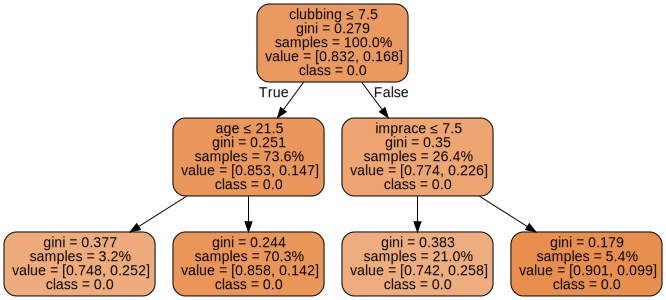

In [21]:
import graphviz
dot_data = sk.tree.export_graphviz(dtc, out_file=None, 
                         feature_names=list(X_m_i.columns),  
                        #class_names = ['1.0' if i == 1 else '0.0' for i in y.unique()] ,
                         class_names = ['1.0' if i == 1 else '0.0' for i in dtc.classes_] ,
                        #class_names =[i for i in temp1['match'].unique()],
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph

# ------------------------------------------------------------------

In [22]:
wave_n_i = sd[(sd['race']==1)|(sd['race']==5)].loc[:, interest]

In [23]:
wave_n_i=wave_n_i.dropna(axis=0, how='any')

X_n_i, y_n_i = wave_n_i.drop(['match'], axis=1), wave_n_i['match']

kb = fs.SelectKBest(k=10)
kb.fit(X_n_i, y_n_i)

names = X_n_i.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

SelectKBest(k=10, score_func=<function f_classif at 0x1109eaa60>)

  Feat_names   F_Scores
4   tvsports  15.477370
9       yoga  14.390030
7     hiking  13.542088
0        age   7.072909
5    museums   7.009985
6        art   6.711754
2       goal   6.415104
3     sports   5.674616
1   field_cd   5.631064
8    reading   4.922893


In [24]:
interest_best = ['match','age','art','tvsports','hiking','museums',
          'goal','reading','sports','field_cd','yoga']
wave6_n_i = sd[(sd['race']==1)|(sd['race']==5)].loc[:, interest_best]

In [25]:
wave6_n_i=wave6_n_i.dropna(axis=0, how='any')
wave6_n_i.isnull().sum()
len(wave6_n_i[wave6_n_i['match']==1])
len(wave6_n_i[wave6_n_i['match']==0])

match       0
age         0
art         0
tvsports    0
hiking      0
museums     0
goal        0
reading     0
sports      0
field_cd    0
yoga        0
dtype: int64

85

335

In [33]:
X_n_i, y_n_i = wave6_n_i.drop(['match'], axis=1), wave6_n_i['match']

dtc = tree.DecisionTreeClassifier(max_depth=2).fit(X_n_i, y_n_i)
dtc_labels = dtc.predict(X_n_i)
dtc_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

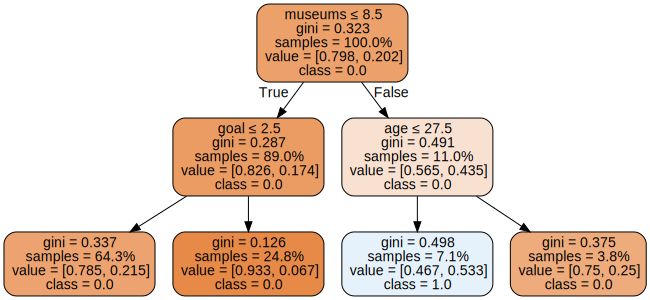

In [34]:
import graphviz
dot_data = sk.tree.export_graphviz(dtc, out_file=None, 
                         feature_names=list(X_n_i.columns),  
                        #class_names = ['1.0' if i == 1 else '0.0' for i in y.unique()] ,
                         class_names = ['1.0' if i == 1 else '0.0' for i in dtc.classes_] ,
                        #class_names =[i for i in temp1['match'].unique()],
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph

# --------------------------------------------------------------------

In [94]:
attributes=['match','gender','attr1_1', 'sinc1_1',
       'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1',
       'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1',
       'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1',
       'fun3_1', 'intel3_1', 'amb3_1']#, 'attr5_1', 'sinc5_1', 'intel5_1',
       #'fun5_1', 'amb5_1']

In [95]:
wave_m_a = sd[sd['race']==2].loc[:, attributes]
wave_m_a.isnull().sum()

match          0
gender         0
attr1_1       16
sinc1_1       16
intel1_1      16
fun1_1        16
amb1_1        26
shar1_1       26
attr4_1     1056
sinc4_1     1056
intel4_1    1056
fun4_1      1056
amb4_1      1056
shar4_1     1056
attr2_1       16
sinc2_1       16
intel2_1      16
fun2_1        16
amb2_1        16
shar2_1       16
attr3_1       34
sinc3_1       34
fun3_1        34
intel3_1      34
amb3_1        34
dtype: int64

In [96]:
wave_m_a=wave_m_a.dropna(axis=0, how='any')


In [97]:
X_m_a, y_m_a = wave_m_a.drop(['match'], axis=1), wave_m_a['match']

kb = fs.SelectKBest(k=10)
kb.fit(X_m_a, y_m_a)

names = X_m_a.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

SelectKBest(k=10, score_func=<function f_classif at 0x1109eaa60>)

  Feat_names   F_Scores
4    shar1_1  19.264428
6    sinc4_1  12.879881
8    shar2_1   5.825384
9   intel3_1   5.731425
5    attr4_1   5.464743
7     amb4_1   5.433862
3     fun1_1   4.762889
1    attr1_1   4.072684
2   intel1_1   3.551638
0     gender   3.212550


In [98]:
#attributes_best = ['match','shar1_1','sinc4_1','attr4_1', 'amb4_1', 'fun1_1', 'intel3_1',
                   #'shar2_1','intel1_1','fun5_1','attr1_1']

attributes_best = ['match','shar1_1','sinc4_1','shar2_1', 'intel3_1', 'attr4_1', 'amb4_1',
                   'fun1_1','attr1_1','intel1_1','gender']
wave_m_a = sd[sd['race']==2].loc[:, attributes_best]
wave_m_a.isnull().sum()

match          0
shar1_1       26
sinc4_1     1056
shar2_1       16
intel3_1      34
attr4_1     1056
amb4_1      1056
fun1_1        16
attr1_1       16
intel1_1      16
gender         0
dtype: int64

In [99]:
wave_m_a=wave_m_a.dropna(axis=0, how='any')
wave_m_a.head()

,match,shar1_1,sinc4_1,shar2_1,intel3_1,attr4_1,amb4_1,fun1_1,attr1_1,intel1_1,gender
1846,0,0.555667,0.2,0.606,0.857143,0.055556,0.1,0.3334,0.1667,0.3334,0
1847,0,0.555667,0.2,0.606,0.857143,0.055556,0.1,0.3334,0.1667,0.3334,0
1848,0,0.555667,0.2,0.606,0.857143,0.055556,0.1,0.3334,0.1667,0.3334,0
1849,1,0.555667,0.2,0.606,0.857143,0.055556,0.1,0.3334,0.1667,0.3334,0
1850,0,0.555667,0.2,0.606,0.857143,0.055556,0.1,0.3334,0.1667,0.3334,0


match       0
shar1_1     0
sinc4_1     0
shar2_1     0
intel3_1    0
attr4_1     0
amb4_1      0
fun1_1      0
attr1_1     0
intel1_1    0
gender      0
dtype: int64

578

3075

array([0, 0, 0, ..., 0, 0, 0])

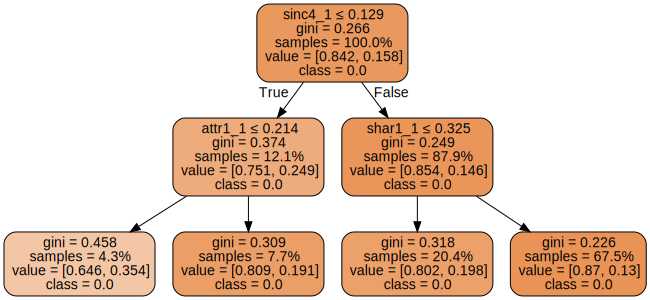

In [100]:
wave_m_a.isnull().sum()
len(wave_m_a[wave_m_a['match']==1])
len(wave_m_a[wave_m_a['match']==0])

X_m_a, y_m_a = wave_m_a.drop(['match'], axis=1), wave_m_a['match']

dtc = tree.DecisionTreeClassifier(max_depth=2).fit(X_m_a, y_m_a)
dtc_labels = dtc.predict(X_m_a)
dtc_labels

import graphviz
dot_data = sk.tree.export_graphviz(dtc, out_file=None, 
                         feature_names=list(X_m_a.columns),  
                         class_names = ['1.0' if i == 1 else '0.0' for i in dtc.classes_] ,
                        #class_names =[i for i in temp1['match'].unique()],
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph

In [101]:
wave_n_a = sd[(sd['race']==1)|(sd['race']==5)].loc[:, attributes]

In [102]:
wave_n_a=wave_n_a.dropna(axis=0, how='any')

X_n_a, y_n_a = wave_n_a.drop(['match'], axis=1), wave_n_a['match']

kb = fs.SelectKBest(k=10)
kb.fit(X_n_a, y_n_a)

names = X_n_a.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

SelectKBest(k=10, score_func=<function f_classif at 0x1109eaa60>)

  Feat_names   F_Scores
8    sinc3_1  12.895709
1    attr1_1   9.786297
2    shar1_1   8.492113
7    attr3_1   7.891883
5    sinc2_1   6.058499
6    shar2_1   4.482361
3    attr4_1   4.381011
4     fun4_1   3.399869
0     gender   2.284918
9     fun3_1   2.186651


In [103]:
#attributes_best = ['match','sinc3_1','intel3_1', 'shar1_1', 'sinc5_1', 'sinc2_1',
                   #'sinc4_1','attr1_1','shar2_1','fun2_1','fun4_1']

attributes_best = ['match','sinc3_1','attr1_1', 'shar1_1', 'attr3_1', 'sinc2_1',
                   'shar2_1','attr4_1','fun4_1','gender','fun3_1']
wave_n_a = sd[(sd['race']==1)|(sd['race']==5)].loc[:, attributes_best]

In [104]:
wave_n_a=wave_n_a.dropna(axis=0, how='any')
wave_n_a.isnull().sum()
len(wave_n_a[wave_n_a['match']==1])
len(wave_n_a[wave_n_a['match']==0])

match      0
sinc3_1    0
attr1_1    0
shar1_1    0
attr3_1    0
sinc2_1    0
shar2_1    0
attr4_1    0
fun4_1     0
gender     0
fun3_1     0
dtype: int64

64

248

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

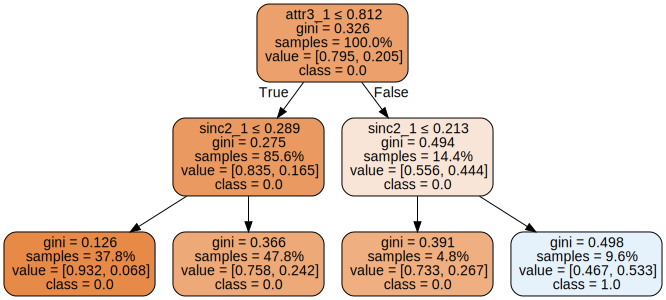

In [105]:
X_n_a, y_n_a = wave_n_a.drop(['match'], axis=1), wave_n_a['match']

dtc = tree.DecisionTreeClassifier(max_depth=2).fit(X_n_a, y_n_a)
dtc_labels = dtc.predict(X_n_a)
dtc_labels

import graphviz
dot_data = sk.tree.export_graphviz(dtc, out_file=None, 
                         feature_names=list(X_n_a.columns),  
                         class_names = ['1.0' if i == 1 else '0.0' for i in dtc.classes_] ,
                        #class_names =[i for i in temp1['match'].unique()],
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph

In [ ]:
# select wave 6-9 and majority group (European)
wave6_m = sd[(sd['wave'].between(6,10))&(sd['race']==2)].loc[:, interest]


In [ ]:
wave6_m.isnull().sum()

In [ ]:
wave6_m=wave6_m.dropna(axis=0, how='any')

In [ ]:
X, y = wave6_m.drop(['match'], axis=1), wave6_m['match']

In [ ]:
kb = fs.SelectKBest(k=10)
kb.fit(X, y)  # fit it to your data
#selected=kb.get_support(indices=True)
#selected

In [ ]:
names = X.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

# decision tree

In [ ]:
interest = ['match','field_cd','order','date','imprace','tv',
          'imprelig','hiking','movies','shopping','yoga']
wave6_m = sd[(sd['wave'].between(1,6)|sd['wave'].between(10,22))&(sd['race']==2)].loc[:, interest]
len(wave6_m[wave6_m['match']==1])
len(wave6_m[wave6_m['match']==0])

In [ ]:
# drop nan value
wave6_m=wave6_m.dropna(axis=0, how='any')
wave6_m.head()

X_m_i, y_m_i = wave6_m.drop(['match'], axis=1), wave6_m['match']

In [ ]:
wave6_m.describe()

In [ ]:
y_m_i.unique()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=2).fit(X_m_i, y_m_i)

In [ ]:
dtc_labels = dtc.predict(X_m_i)


In [ ]:
dtc_labels

In [ ]:
import graphviz
dot_data = sk.tree.export_graphviz(dtc, out_file=None, 
                         feature_names=list(X_m_i.columns),  
                        #class_names = ['1.0' if i == 1 else '0.0' for i in y.unique()] ,
                         class_names = ['0.0' if i == 1 else '0.0' for i in dtc.classes_] ,
                        #class_names =[i for i in temp1['match'].unique()],
                         filled=True, rounded=True,  
                         special_characters=True, 
                         proportion=True,
                        )  
graph = graphviz.Source(dot_data)  
graph

In [ ]:
# select wave 6-9 and minority group (European)
wave6_n= sd[(sd['wave'].between(6,10))&((sd['race']==1)
                                        |(sd['race']==5))].loc[:, interest]
wave6_n.head()

In [ ]:
wave6_n.isnull().sum()

In [ ]:
wave6_n=wave6_n.dropna(axis=0, how='any')

In [ ]:
X1, y1 = wave6_n.drop(['match'], axis=1), wave6_n['match']

In [ ]:
kb1 = fs.SelectKBest(k=10)
kb1.fit(X1, y1)

In [ ]:
names = X1.columns.values[kb1.get_support()]
scores = kb1.scores_[kb1.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

# select attributes 
attributes =['match','attr1_1', 'sinc1_1', 'intel1_1',\
             'fun1_1', 'amb1_1', 'shar1_1','attr2_1', 'sinc2_1','intel2_1', 'fun2_1', \
             'amb2_1', 'shar2_1', 'attr3_1','sinc3_1','fun3_1', 'intel3_1', 'amb3_1',\
             'attr4_1', 'sinc4_1', 'intel4_1','fun4_1', 'amb4_1', 'shar4_1','attr5_1', 
             'sinc5_1', 'intel5_1','fun5_1', 'amb5_1' ]

In [ ]:
attributes =['match','attr', 'sinc', 'intel',\
             'fun', 'amb', 'shar']

In [ ]:
# wave 6-9 majority
wave6_m_a = sd[(sd['wave'].between(6,10))&(sd['race']==2)].loc[:, attributes]
wave6_m_a.head()

In [ ]:
wave6_m_a.isnull().sum()
wave6_m_a=wave6_m_a.dropna(axis=0, how='any')

In [ ]:
X_m_a, y_m_a = wave6_m_a.drop(['match'], axis=1), wave6_m_a['match']

In [ ]:
kb = fs.SelectKBest(k=3)
kb.fit(X_m_a, y_m_a)

In [ ]:
names = X_m_a.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

In [ ]:
# wave 6-9 minority
wave6_n_a = sd[(sd['wave'].between(6,10))&((sd['race']==1)
                                        |(sd['race']==5))].loc[:, attributes]
wave6_n_a.head()

In [ ]:
wave6_n_a.isnull().sum()
wave6_n_a=wave6_n_a.dropna(axis=0, how='any')

In [ ]:
X_n_a, y_n_a = wave6_n_a.drop(['match'], axis=1), wave6_n_a['match']

In [ ]:
kb = fs.SelectKBest(k=3)
kb.fit(X_n_a, y_n_a)

In [ ]:
names = X_n_a.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

In [ ]:
wave_m_i = sd[(sd['wave'].between(1,6)|sd['wave'].between(10,22))&(sd['race']==2)].loc[:, interest]
# drop nan value
wave_m_i=wave_m_i.dropna(axis=0, how='any')

X_m_i, y_m_i = wave_m_i.drop(['match'], axis=1), wave_m_i['match']

kb = fs.SelectKBest(k=10)
kb.fit(X_m_i, y_m_i)

names = X_m_i.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

In [ ]:
interest = ['match','field_cd','age','date','imprace','clubbing',
          'imprelig','go_out','art','samerace','yoga']
wave_m_i = sd[(sd['wave'].between(1,6)|sd['wave'].between(10,22))&(sd['race']==2)].loc[:, interest]
len(wave_m_i[wave_m_i['match']==1])
len(wave_m_i[wave_m_i['match']==0])

In [ ]:
wave_n_i = sd[(sd['wave'].between(1,6)|sd['wave'].between(10,22))&((sd['race']==1)
                                        |(sd['race']==5))].loc[:, interest]
# drop nan value
wave_n_i=wave_n_i.dropna(axis=0, how='any')

X_n_i, y_n_i = wave_n_i.drop(['match'], axis=1), wave_n_i['match']

kb = fs.SelectKBest(k=10)
kb.fit(X_n_i, y_n_i)

names = X_n_i.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

In [ ]:
wave_m_a = sd[(sd['wave'].between(1,6)|sd['wave'].between(10,22))&(sd['race']==2)].loc[:, attributes]
# drop nan value
wave_m_a=wave_m_a.dropna(axis=0, how='any')
wave_m_a.isnull().sum()
wave_m_a

In [ ]:
X_m_a, y_m_a = wave_m_a.drop(['match'], axis=1), wave_m_a['match']

kb = fs.SelectKBest(k=10)
kb.fit(X_m_a, y_m_a)

names = X_m_a.columns.values[kb.get_support()]
scores = kb.scores_[kb.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)